**Cats vs Dogs Classification**


In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2021-07-27 03:43:50--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.73.0.105, 2600:1406:3f:384::e59, 2600:1406:3f:3a0::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.73.0.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  74.2MB/s    in 11s     

2021-07-27 03:44:01 (71.6 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [ ]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

    dataset = []
    
    for unitData in os.listdir(SOURCE):
        data = SOURCE + unitData
        if(os.path.getsize(data) > 0):
            dataset.append(unitData)
        else:
            print('Skipped ' + unitData)
            print('Invalid file i.e zero size')
    
    train_set_length = int(len(dataset) * SPLIT_SIZE)
    test_set_length = int(len(dataset) - train_set_length)
    shuffled_set = random.sample(dataset, len(dataset))
    train_set = dataset[0:train_set_length]
    test_set = dataset[-test_set_length:]
       
    for unitData in train_set:
        temp_train_set = SOURCE + unitData
        final_train_set = TRAINING + unitData
        copyfile(temp_train_set, final_train_set)
    
    for unitData in test_set:
        temp_test_set = SOURCE + unitData
        final_test_set = TESTING + unitData
        copyfile(temp_test_set, final_test_set)

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

Skipped 666.jpg
Invalid file i.e zero size
Skipped 11702.jpg
Invalid file i.e zero size


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-07-27 03:44:31--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   124MB/s    in 0.7s    

2021-07-27 03:44:34 (124 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = 'imagenet')

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

In [ ]:
# Working on pretrained model.
last_layer = pre_trained_model.get_layer("mixed9")
print(f"The shape of last output layer is {last_layer.output_shape}")
last_output = last_layer.output

The shape of last output layer is (None, 8, 8, 2048)


In [ ]:
# Building the Callbacks 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy") > 0.99):
      print("\nReached 99% accurcy so stopping the execution of the program!")
      self.model.stop_training = True

# Instantiation
callbacks = myCallback()

In [ ]:
# Processing the Model

# Flatten the output layer of pretrained model into 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Adding fully connected layer with relu activation
x = tf.keras.layers.Dense(units=1024, activation="relu")(x)
# Adding dropout with rate 0.2
x = tf.keras.layers.Dropout(0.2)(x)
# Adding final sigmoid layer for activation
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Preparing the final Model
model = Model(pre_trained_model.input, x)

In [ ]:
# Compile the Model
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
# Summary of Neural Network
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# Normalizing all the images
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "/tmp/cats-v-dogs/training",
    target_size=(300, 300),
    batch_size=128,
    class_mode="binary"
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "/tmp/cats-v-dogs/testing",
    target_size=(300, 300),
    batch_size=32, 
    class_mode="binary"
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=8, 
    epochs=50,
    verbose=2,
    validation_data=validation_generator,
    validation_steps=8,
    callbacks=[callbacks]
)

Epoch 1/50
8/8 - 62s - loss: 1.3976 - accuracy: 0.7783 - val_loss: 0.0487 - val_accuracy: 0.9766
Epoch 2/50
8/8 - 24s - loss: 0.0933 - accuracy: 0.9668 - val_loss: 0.0166 - val_accuracy: 0.9961
Epoch 3/50
8/8 - 25s - loss: 0.0640 - accuracy: 0.9766 - val_loss: 0.0214 - val_accuracy: 0.9961
Epoch 4/50
8/8 - 24s - loss: 0.0829 - accuracy: 0.9736 - val_loss: 0.2646 - val_accuracy: 0.9258
Epoch 5/50
8/8 - 24s - loss: 0.0769 - accuracy: 0.9785 - val_loss: 0.0204 - val_accuracy: 0.9922
Epoch 6/50
8/8 - 25s - loss: 0.1469 - accuracy: 0.9577 - val_loss: 0.0237 - val_accuracy: 0.9922
Epoch 7/50
8/8 - 24s - loss: 0.0642 - accuracy: 0.9805 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 8/50
8/8 - 24s - loss: 0.0543 - accuracy: 0.9824 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 9/50
8/8 - 24s - loss: 0.0374 - accuracy: 0.9824 - val_loss: 0.0503 - val_accuracy: 0.9922


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Epoch 10/50
8/8 - 23s - loss: 0.1223 - accuracy: 0.9590 - val_loss: 0.0367 - val_accuracy: 0.9805
Epoch 11/50
8/8 - 25s - loss: 0.0720 - accuracy: 0.9746 - val_loss: 0.0252 - val_accuracy: 0.9922
Epoch 12/50
8/8 - 24s - loss: 0.0450 - accuracy: 0.9814 - val_loss: 0.0173 - val_accuracy: 0.9961
Epoch 13/50
8/8 - 23s - loss: 0.0564 - accuracy: 0.9814 - val_loss: 0.1172 - val_accuracy: 0.9688
Epoch 14/50
8/8 - 24s - loss: 0.0581 - accuracy: 0.9805 - val_loss: 0.0286 - val_accuracy: 0.9922
Epoch 15/50
8/8 - 23s - loss: 0.0772 - accuracy: 0.9717 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 16/50
8/8 - 25s - loss: 0.0605 - accuracy: 0.9795 - val_loss: 0.0676 - val_accuracy: 0.9766
Epoch 17/50
8/8 - 23s - loss: 0.1011 - accuracy: 0.9648 - val_loss: 0.0575 - val_accuracy: 0.9688
Epoch 18/50
8/8 - 25s - loss: 0.0734 - accuracy: 0.9756 - val_loss: 0.0097 - val_accuracy: 0.9961
Epoch 19/50
8/8 - 24s - loss: 0.0623 - accuracy: 0.9805 - val_loss: 0.0130 - val_accuracy: 0.9922
Epoch 20/50
8/8 - 24

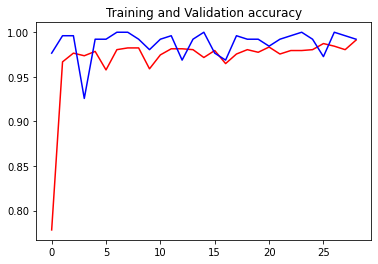

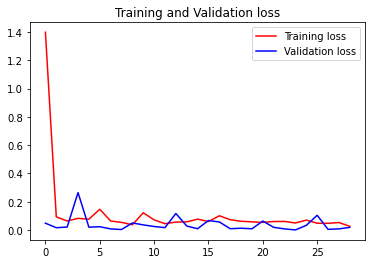

In [ ]:
# Plotting loss vs accuracy

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")

plt.legend()
plt.show()